<a href="https://colab.research.google.com/github/The237/pythonCodesISJS/blob/master/m2_isjs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import gradio as gd

In [3]:
data = pd.read_csv("diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
X = data.drop(['Outcome'], axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
y = data[["Outcome"]]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [6]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = .3)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [9]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [11]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

<ipython-input-11-417871beee20>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.7878787878787878

In [66]:
X_test.shape

(231, 8)

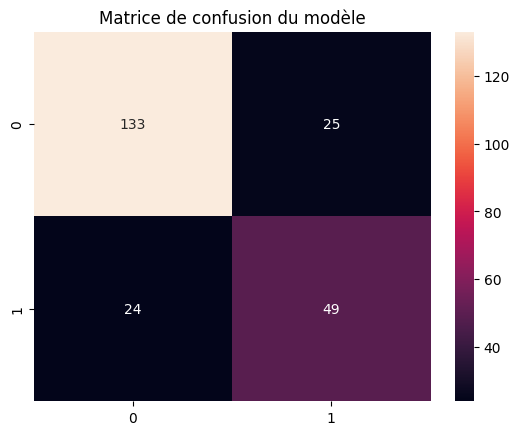

In [90]:
sns.heatmap(confusion_matrix(y_test,rf.predict(X_test)),annot=True,fmt="d")
plt.title("Matrice de confusion du modèle")
plt.show()

In [13]:
import pickle
with open("random.pkl","wb") as f:
  pickle.dump(rf,f)

In [14]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [81]:
from sklearn.preprocessing import StandardScaler


def make_predictions(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
       BMI, DiabetesPedigreeFunction, Age):
  sc = StandardScaler()
  with open("random.pkl","rb") as f:
    rf = pickle.load(f)
    data = sc.fit_transform(np.array([Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
       BMI, DiabetesPedigreeFunction, Age]).reshape(-1,1))
    preds = rf.predict(data.T)
    if preds == 1:
      return "You have diabetes"
    return "You are safe"

In [82]:
Pregnancies = gd.Number(label="Pregnancies number")
Glucose = gd.Number(label="Glucose")
BloodPressure = gd.Number(label="BloodPressure")
SkinThickness = gd.Number(label="SkinThickness")
Insulin = gd.Number(label="Insulin")
BMI = gd.Number(label="BMI")
DiabetesPedigreeFunction = gd.Number(label="DiabetesPedigreeFunction")
Age = gd.Number(label="Age")
BMI = gd.Number(label="BMI")

In [83]:
np.array([6, 148, 72, 35, 0,33, 0.627, 50]).reshape(-1,1)

array([[  6.   ],
       [148.   ],
       [ 72.   ],
       [ 35.   ],
       [  0.   ],
       [ 33.   ],
       [  0.627],
       [ 50.   ]])

In [84]:
make_predictions(6, 148, 72, 35, 0,33, 0.627, 50)

'You have diabetes'

In [85]:
output = gd.Textbox()

In [ ]:
app = gd.Interface(fn = make_predictions, inputs = [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
       BMI, DiabetesPedigreeFunction, Age], outputs = output)
app.launch(debug = True)